# HOUSE SALE PRICE PREDICTION

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("House-Price-Prediction.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


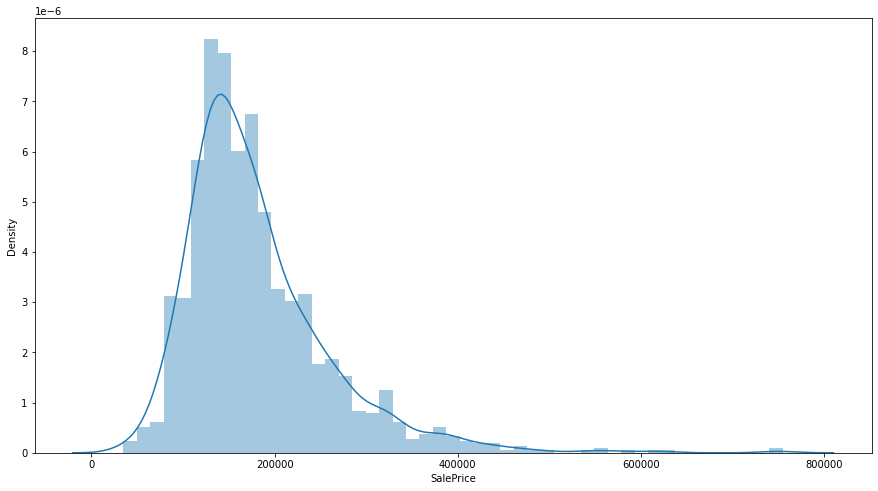

In [3]:
plt.figure(figsize=(15,8))
sns.distplot(df.SalePrice)
plt.show()

In [4]:
df.drop("Id",axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
cols=["MSSubClass","OverallQual","OverallCond"]
for i in cols:
    df[i]=df[i].astype("object")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

##### CHECK FOR MISSING VALUES

In [8]:
(df.isna().sum())/(df.index.size)*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

GUIDELINE-GREATER THAN 15% , THAT COLUMN CAN BE DROPPED

In [9]:
(df.isnull().sum()/(df.index.size)*100)[(df.isnull().sum()/df.index.size)*100  > 0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [10]:
df_num=df.select_dtypes(np.number)
df_num=df_num.drop("SalePrice",axis=1)


df_cat=df.select_dtypes("object")
                        

In [11]:
df_num.columns.shape

(33,)

SCALING IN DONE FOR INDEPENDENT FEATURES ,INORDER TO AVOID DATA PREFERENCE TO A FEATURE WHICH HAS HIGHER VALUE.WE BRING ALL INDEPENDENT FEATURES TO A COMMON SCALE.

In [12]:
cols=list(df_num)
cols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

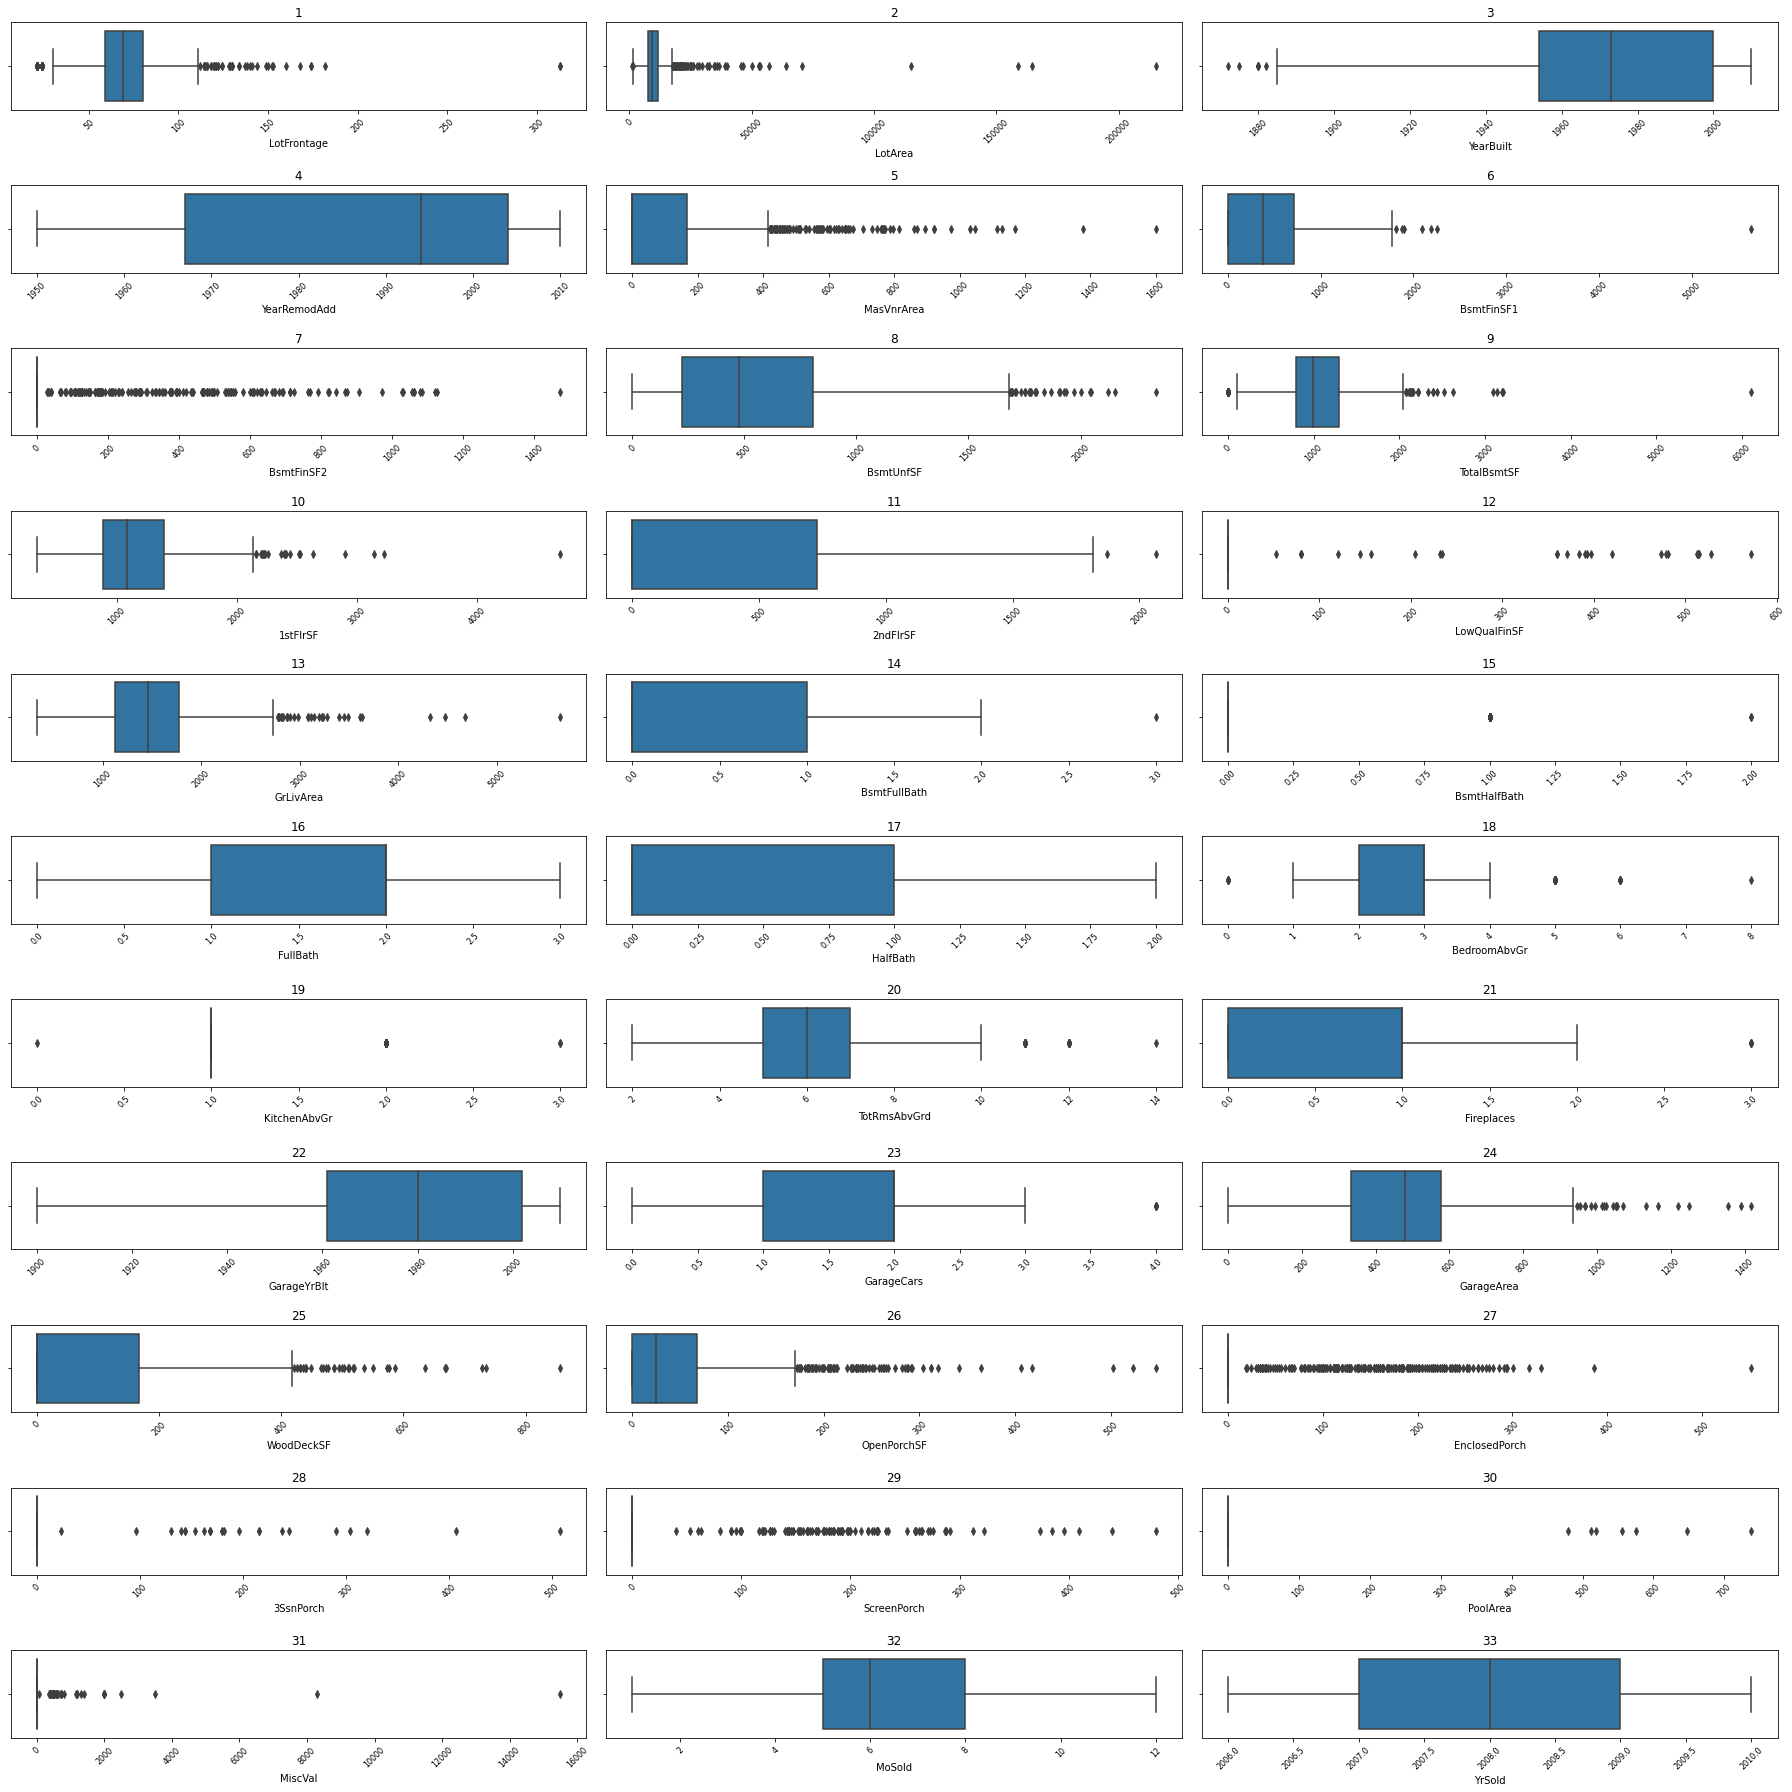

In [13]:
plt.rcParams['figure.figsize']=25,25
t=1
for i in cols:
    plt.subplot(11,3,t)
    sns.boxplot(x=df_num[i])
    plt.title(t)
    t+=1
    
    plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.show()

In [14]:
from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors=5)
df_num_sc=pd.DataFrame(imputer.fit_transform(df_num),columns=df_num.columns)

WE CAN'T GIVE K=1 AS N NEIGHBOURES,AS IT HAS HIGH CHANCES OF GETTING AFFECTED BY OUTLIERS

IMPUTE CATEGORICAL COLS

In [15]:
(df_cat.isnull().sum()/(df.index.size)*100)[(df_cat.isnull().sum()/df.index.size)*100  > 0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

1. WHERE EVR WE HAVE NULL VALUES, WE REPLACE IT WIHT 0 AND VALUES AVAILABLE WITH 1. TO FORM PATTERNS

In [16]:
df_cat["PoolQC"].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [17]:
df_cat['PoolQC_ava']=df_cat['PoolQC'].replace(np.nan,0).replace('Gd',1).replace('Ex',1).replace('Fa',1)
df_cat.PoolQC_ava.value_counts()

0    1453
1       7
Name: PoolQC_ava, dtype: int64

In [18]:
# similarly for miscfeature column
df_cat['MiscFeature'].value_counts()



Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [19]:
df_cat['MiscFeature'].value_counts()

df_cat['MiscFeature_ava']=df_cat['MiscFeature'].replace(np.nan,0).replace('Shed',1).replace('Gar2',1).replace('Othr',1).replace('TenC',1)
df_cat.MiscFeature_ava.value_counts()

0    1406
1      54
Name: MiscFeature_ava, dtype: int64

In [20]:
print(df_cat['Alley'].value_counts())
df_cat['Alley_ava']=df_cat['Alley'].replace(np.nan,0).replace('Grvl',1).replace('Pave',1)
print(df_cat['Alley_ava'].value_counts())
print(df_cat['Fence'].value_counts())

df_cat['Fence_ava']=df_cat['Fence'].replace(np.nan,0).replace('MnPrv',1).replace('GdPrv',1).replace('GdWo',1).replace('MnWw',1)
print(df_cat['Fence_ava'].value_counts())

Grvl    50
Pave    41
Name: Alley, dtype: int64
0    1369
1      91
Name: Alley_ava, dtype: int64
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
0    1179
1     281
Name: Fence_ava, dtype: int64


In [21]:
df_cat['FireplaceQu_ava']=df_cat['FireplaceQu'].replace(np.nan,0).replace('Gd',1).replace('TA',1).replace('Fa',1).replace('Ex',1).replace('Po',1)
print(df_cat['FireplaceQu_ava'].value_counts())
print(df_cat['MasVnrType'].value_counts())
df_cat['MasVnrType_ava']= df_cat['MasVnrType'].replace(np.nan,0).replace('BrkFace',1).replace('Stone',1).replace('BrkCmn',1)
print(df_cat['MasVnrType_ava'].value_counts())

1    770
0    690
Name: FireplaceQu_ava, dtype: int64
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
None    864
1       588
0         8
Name: MasVnrType_ava, dtype: int64


In [22]:
df_cat.drop(['PoolQC','Alley','Fence','FireplaceQu','MiscFeature','MasVnrType'],axis=1,inplace=True)

In [23]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MSSubClass       1460 non-null   object
 1   MSZoning         1460 non-null   object
 2   Street           1460 non-null   object
 3   LotShape         1460 non-null   object
 4   LandContour      1460 non-null   object
 5   Utilities        1460 non-null   object
 6   LotConfig        1460 non-null   object
 7   LandSlope        1460 non-null   object
 8   Neighborhood     1460 non-null   object
 9   Condition1       1460 non-null   object
 10  Condition2       1460 non-null   object
 11  BldgType         1460 non-null   object
 12  HouseStyle       1460 non-null   object
 13  OverallQual      1460 non-null   object
 14  OverallCond      1460 non-null   object
 15  RoofStyle        1460 non-null   object
 16  RoofMatl         1460 non-null   object
 17  Exterior1st      1460 non-null   

In [24]:
df_cat[['PoolQC_ava','Alley_ava','Fence_ava','FireplaceQu_ava','MiscFeature_ava','MasVnrType_ava']] = df_cat[['PoolQC_ava','Alley_ava','Fence_ava','FireplaceQu_ava','MiscFeature_ava','MasVnrType_ava']].astype(object)

In [25]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MSSubClass       1460 non-null   object
 1   MSZoning         1460 non-null   object
 2   Street           1460 non-null   object
 3   LotShape         1460 non-null   object
 4   LandContour      1460 non-null   object
 5   Utilities        1460 non-null   object
 6   LotConfig        1460 non-null   object
 7   LandSlope        1460 non-null   object
 8   Neighborhood     1460 non-null   object
 9   Condition1       1460 non-null   object
 10  Condition2       1460 non-null   object
 11  BldgType         1460 non-null   object
 12  HouseStyle       1460 non-null   object
 13  OverallQual      1460 non-null   object
 14  OverallCond      1460 non-null   object
 15  RoofStyle        1460 non-null   object
 16  RoofMatl         1460 non-null   object
 17  Exterior1st      1460 non-null   

In [26]:
(df_cat.isnull().sum()/(df.index.size)*100)[(df_cat.isnull().sum()/df.index.size)*100  > 0].sort_values(ascending=False)

GarageCond      5.547945
GarageQual      5.547945
GarageFinish    5.547945
GarageType      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
BsmtQual        2.534247
Electrical      0.068493
dtype: float64

In [27]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

# fit it on all non object
imputer=imputer.fit(df_cat.iloc[:,:])

In [28]:
df_cat_trans=imputer.fit_transform(df_cat)

In [29]:
df_cat=pd.DataFrame(df_cat_trans,columns=df_cat.columns)

In [30]:
df_cat.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava,MasVnrType_ava
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Y,WD,Normal,0,0,0,0,0,1
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Y,WD,Normal,0,0,0,0,1,None
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Y,WD,Normal,0,0,0,0,1,1
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,TA,Y,WD,Abnorml,0,0,0,0,1,None
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,Y,WD,Normal,0,0,0,0,1,1


In [31]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   YearBuilt      1460 non-null   float64
 3   YearRemodAdd   1460 non-null   float64
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   float64
 6   BsmtFinSF2     1460 non-null   float64
 7   BsmtUnfSF      1460 non-null   float64
 8   TotalBsmtSF    1460 non-null   float64
 9   1stFlrSF       1460 non-null   float64
 10  2ndFlrSF       1460 non-null   float64
 11  LowQualFinSF   1460 non-null   float64
 12  GrLivArea      1460 non-null   float64
 13  BsmtFullBath   1460 non-null   float64
 14  BsmtHalfBath   1460 non-null   float64
 15  FullBath       1460 non-null   float64
 16  HalfBath       1460 non-null   float64
 17  BedroomAbvGr   1460 non-null   float64
 18  KitchenA

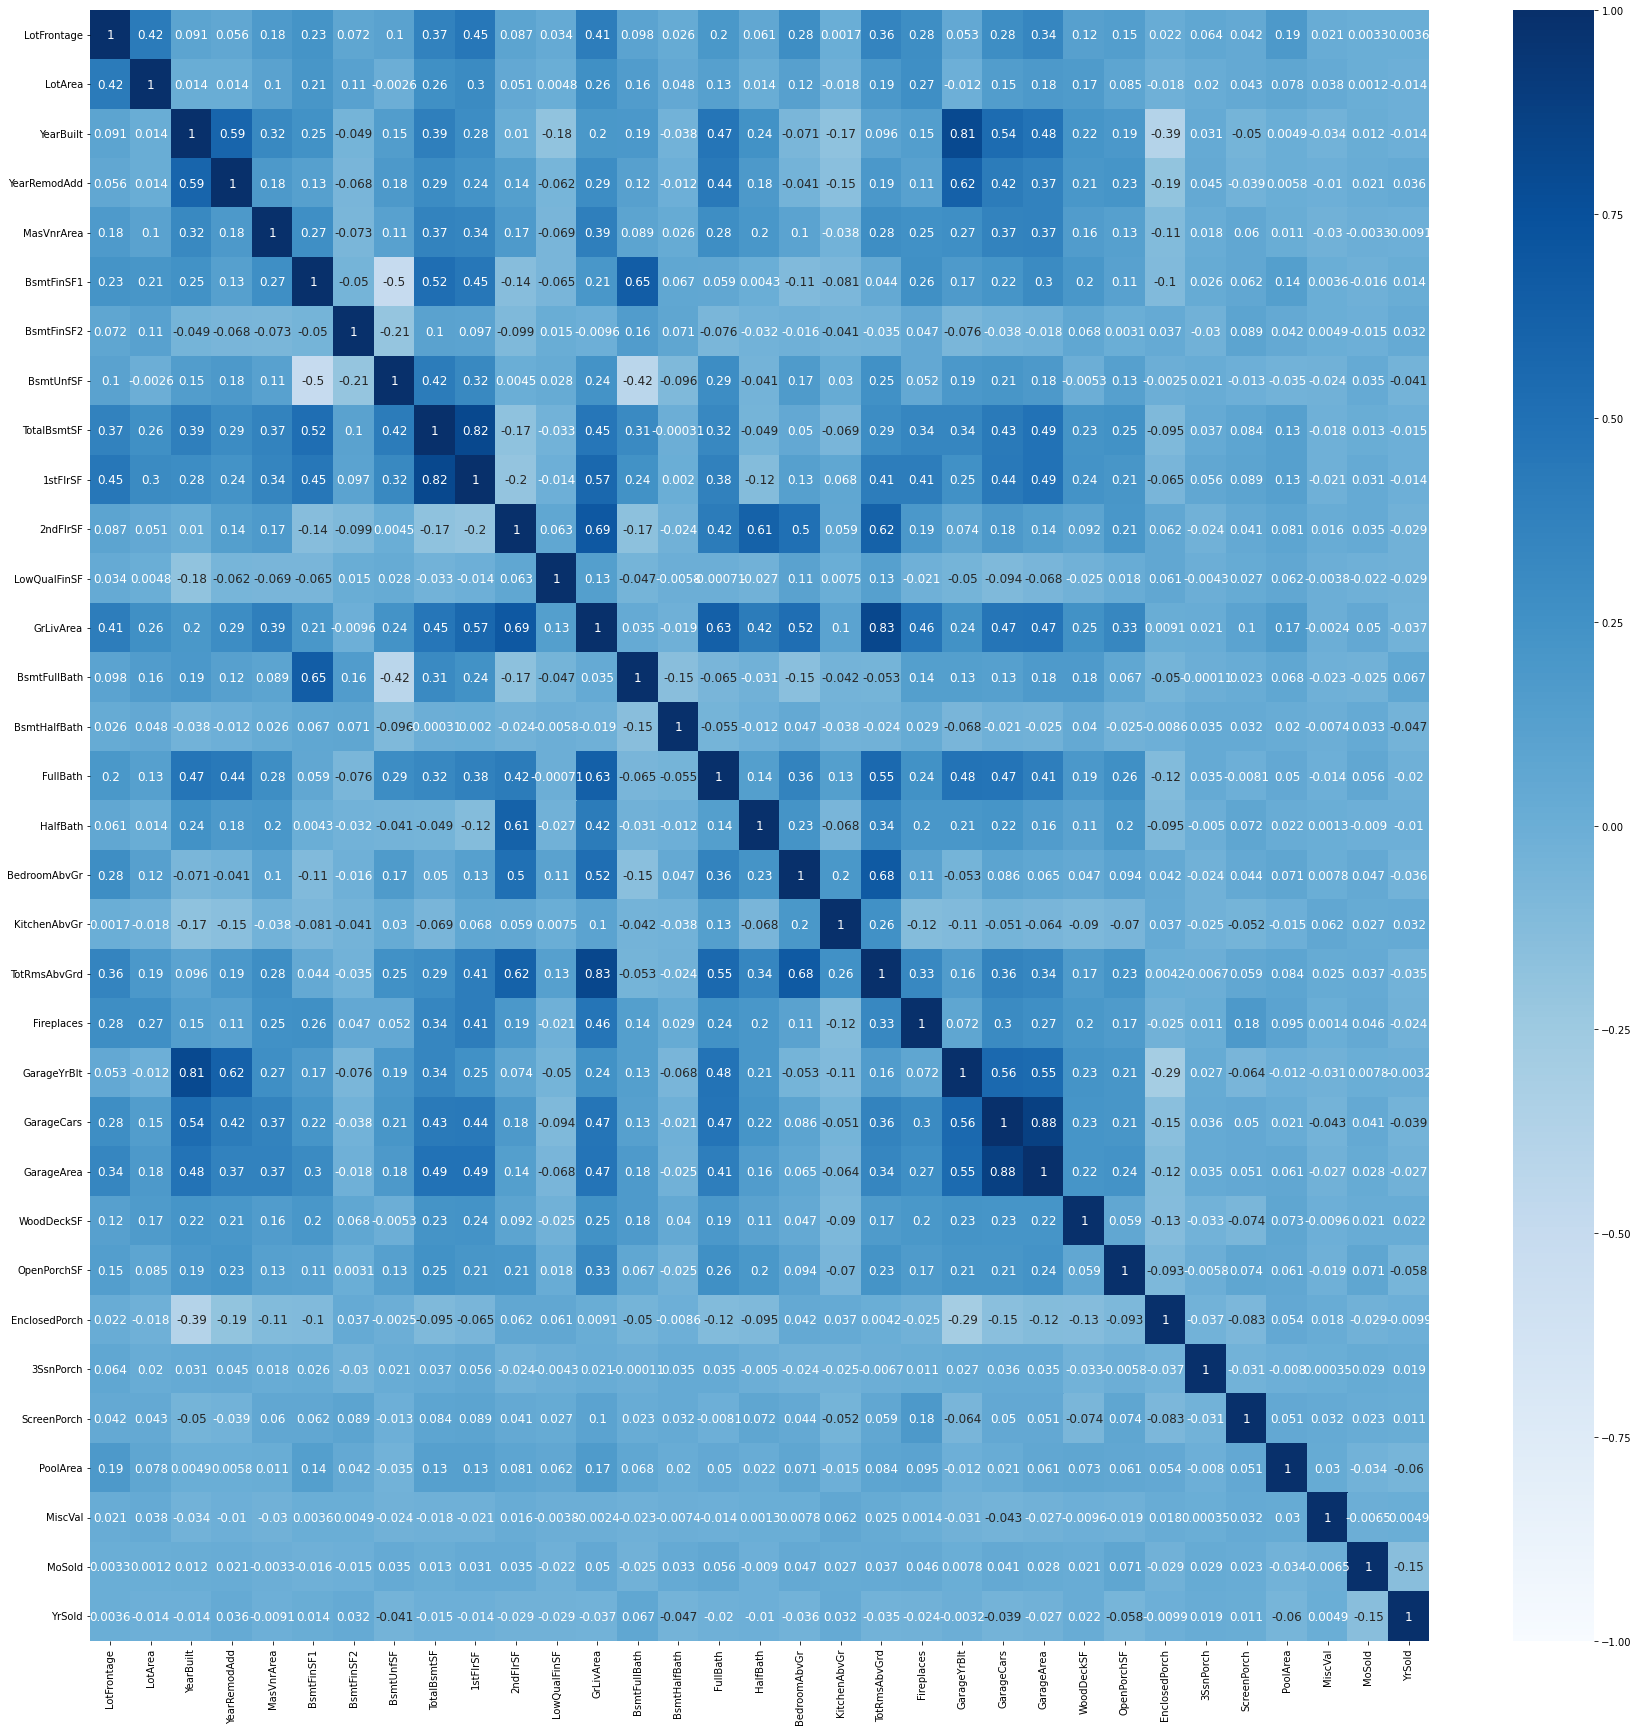

In [32]:
plt.figure(figsize=(30,30))
sns.heatmap(df_num_sc.corr(),cmap='Blues', annot=True,vmax=1,vmin=-1,annot_kws={"size":12})
plt.show()

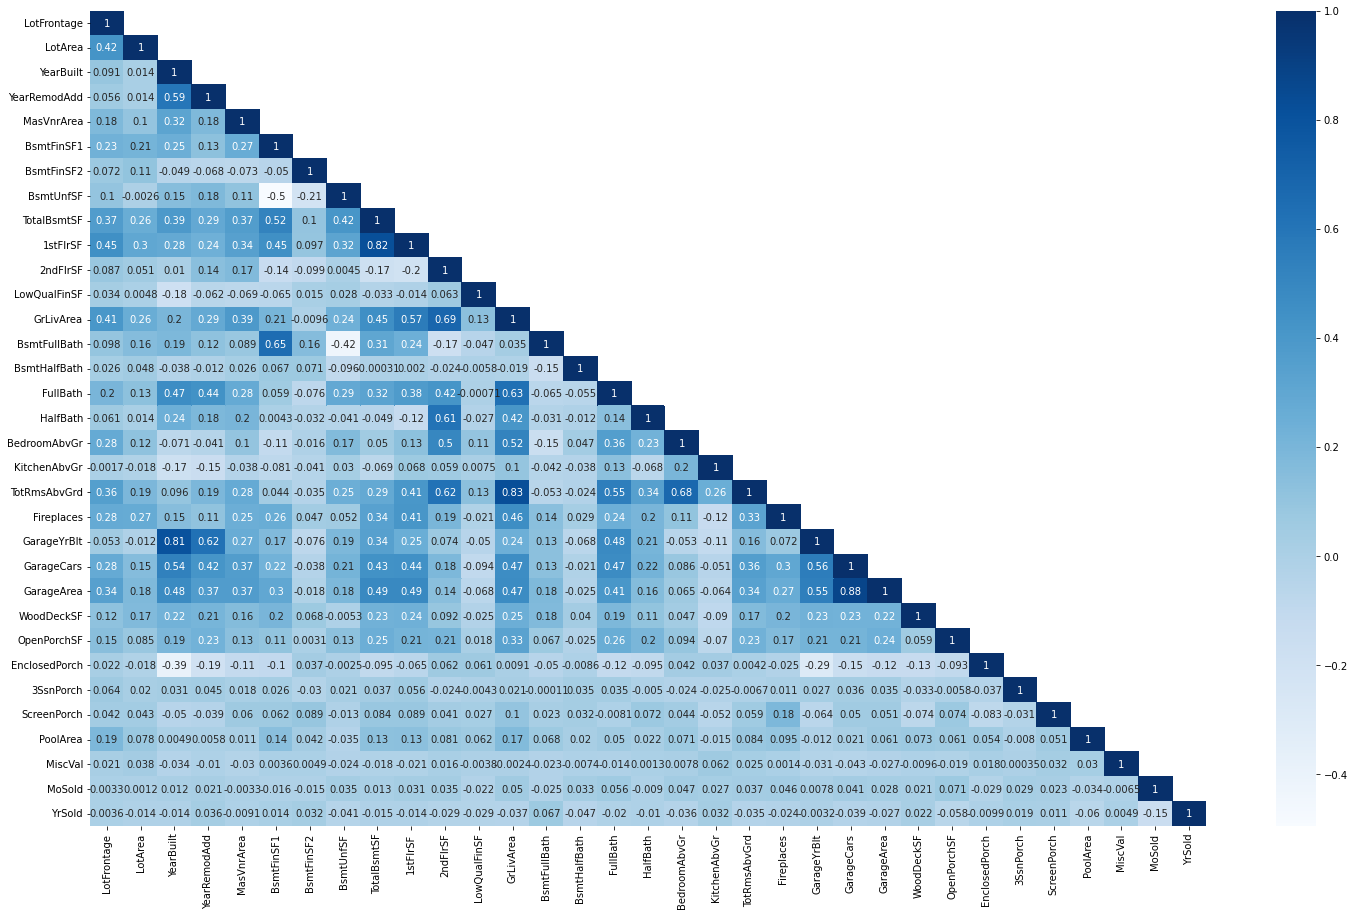

In [33]:
plt.figure(figsize=(25,15))
sns.heatmap(df_num_sc.corr(),annot=True,cmap='Blues',mask=np.triu(df_num_sc.corr(),+1))
plt.show()

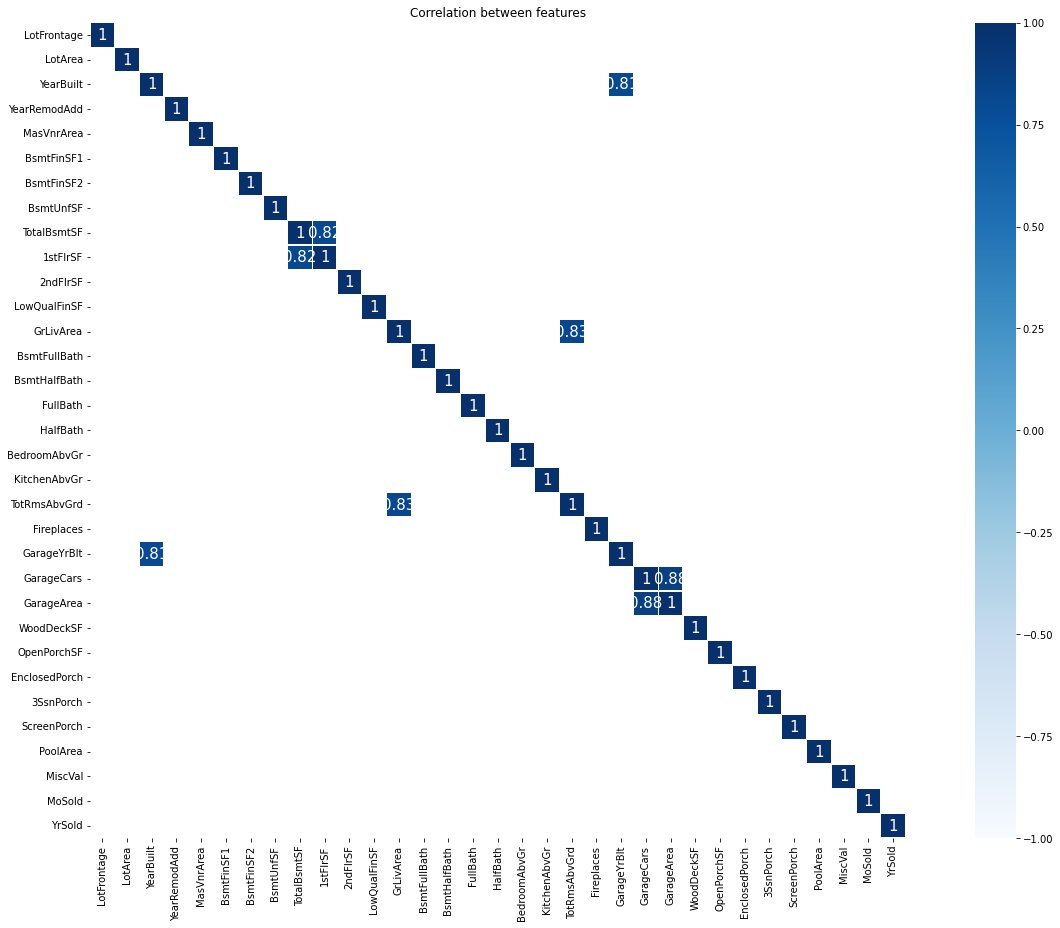

In [34]:
plt.figure(figsize=(25,15))
sns.heatmap(df_num_sc.corr()[(df_num_sc.corr()>=0.75) | (df_num_sc.corr()<=-0.75)],
            annot=True,
            cmap='Blues',
            vmax=1.0,
           vmin=-1.0,
           linewidths=0.2,
           annot_kws={'size':15},
            square=True)
plt.title("Correlation between features")
plt.show()

In [35]:
import sweetviz as sv
report2_num=sv.analyze(df_num_sc)
report2_num.show_html("report2_num_sv.html")

Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:01 -> (00:00 left)


Report report2_num_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
report2_cat=sv.analyze(df_cat)
report2_cat.show_html("report2_cat_svz.html")

In [36]:
import category_encoders as ce

In [37]:
def cat_boost(cat_input,target):
    catboost=ce.cat_boost.CatBoostEncoder()
    catboost.fit(cat_input,target)                              # formula=(sum of target+prior)/(count of observation+1)
    df_encode=round(catboost.transform(cat_input),2)
    
    return df_encode

In [38]:
df_target=np.log(df['SalePrice'])             # transforming the target column

In [39]:
df_cat_en=cat_boost(df_cat,df_target)

In [40]:
df_cat_en.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava,MasVnrType_ava
0,12.34,12.09,12.03,11.94,12.02,12.02,12.00,12.02,12.16,12.04,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.81,12.21
1,12.05,12.09,12.03,11.94,12.02,12.02,12.03,12.02,12.32,11.82,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,11.89
2,12.34,12.09,12.03,12.16,12.02,12.02,12.00,12.02,12.16,12.04,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21
3,11.97,12.09,12.03,12.16,12.02,12.02,12.03,12.02,12.20,12.04,...,12.04,12.06,11.99,11.79,12.02,12.03,12.04,12.06,12.22,11.89
4,12.34,12.09,12.03,12.16,12.02,12.02,12.03,12.02,12.66,12.04,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21


In [41]:
df_cat_en.reset_index(drop=True,inplace=True)
df_num_sc.reset_index(drop=True,inplace=True)

In [42]:
dfDataset=pd.concat([df_num_sc,df_cat_en],axis=1)

In [43]:
dfDataset.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava,MasVnrType_ava
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.81,12.21
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,11.89
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,...,12.04,12.06,11.99,11.79,12.02,12.03,12.04,12.06,12.22,11.89
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21


BASIC MODEL

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [45]:
X=dfDataset
y=df_target

TRAIN-TEST SPLIT

In [46]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                                test_size= .30,
                                                random_state=0)

In [47]:
lr=LinearRegression()

model_lr=lr.fit(Xtrain,ytrain)
pred_train=model_lr.predict(Xtrain)
pred_test=model_lr.predict(Xtest)

In [48]:
r2_train=r2_score(ytrain,pred_train)
r2_test=r2_score(ytest,pred_test)

print(r2_train)
print(r2_test)

0.9145487043633221
0.8431040828296533


In [49]:
rmse_train=np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,pred_test))


print(rmse_train)
print(rmse_test)

0.11749714743696052
0.1556989602435684


# CLUSTERING

In [50]:
# scale the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

In [51]:
df_num_standardized=pd.DataFrame(sc.fit_transform(df_num_sc),columns=df_num_sc.columns)

In [52]:
df_num_standardized.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.250384,-0.207142,1.050994,0.878668,0.506062,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,0.381302,-0.091886,0.156734,-0.429577,-0.575300,1.171992,-0.288653,-0.641228,0.466465,0.257140,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,-0.124047,0.073480,0.984752,0.830215,0.318479,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,-0.460946,-0.096897,-1.863632,-0.720298,-0.575300,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.549751,0.375148,0.951632,0.733308,1.355703,0.463568,-0.288653,-0.174865,0.199680,-0.045611,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


In [53]:
from sklearn.cluster import KMeans

cluster_range=range(1,11)
cluster_errors=[]                     # wcss list

for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,n_init=15,random_state=2)
    clusters.fit(df_num_standardized)
    labels=clusters.labels_
    centroids=clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df=pd.DataFrame({"num_clusters":cluster_range,"cluster_errors(wcss)":cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors(wcss)
0,1,48180.000000
1,2,41888.566697
2,3,39364.447905
3,4,37726.886600
4,5,36480.402142
5,6,34941.839910
6,7,33828.268071
7,8,32489.663235
8,9,31374.475433
9,10,30229.322658


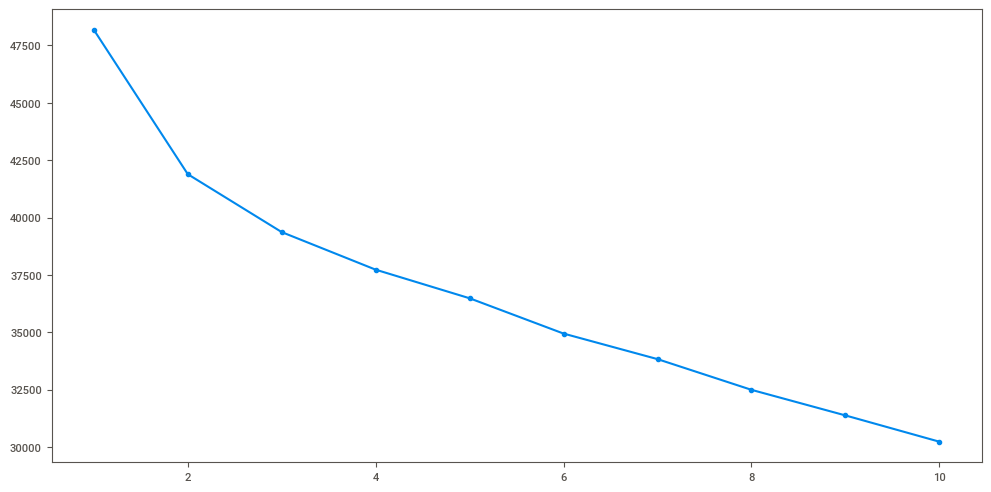

In [54]:
# elbow plot
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df["cluster_errors(wcss)"],marker="o")
plt.show()

In [55]:
n_clusters = [2,3,4,5]
from sklearn.metrics import silhouette_score
for k in n_clusters:
    cluster = KMeans(n_clusters = k, random_state = 10)
    predict = cluster.fit_predict(df_num_standardized)
    score = silhouette_score(df_num_standardized, predict, random_state = 10)
    print("For {} clusters the silhouette score is {})".format(k,score))

For 2 clusters the silhouette score is 0.139388465208881)
For 3 clusters the silhouette score is 0.1378861967687554)
For 4 clusters the silhouette score is 0.127468708788367)
For 5 clusters the silhouette score is 0.11419311097146036)


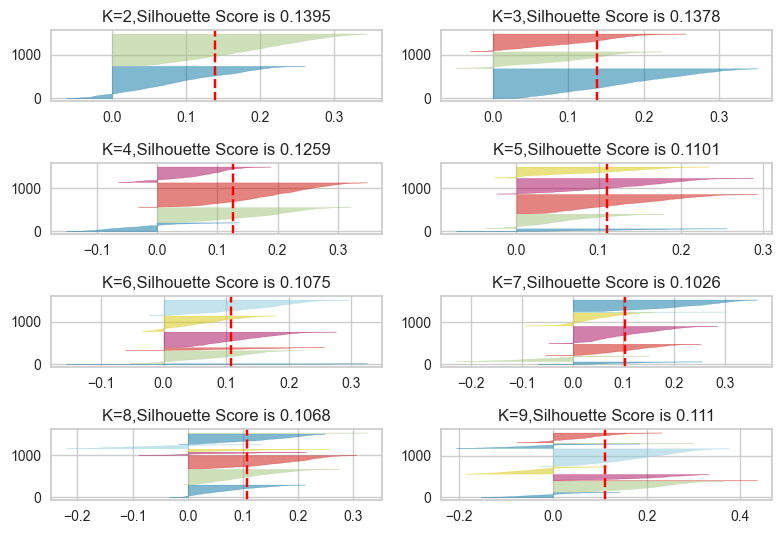

In [56]:
from yellowbrick.cluster import SilhouetteVisualizer
n_clusters=[2,3,4,5,6,7,8,9]
t=1
for j in n_clusters:                    
    plt.subplot(4,2,t)
    model=KMeans(n_clusters=j,random_state=43)
    sil_viz=SilhouetteVisualizer(model,colors="yellowbrick")
    sil_viz.fit(df_num_standardized)
    plt.title(f'K={j},Silhouette Score is {round(sil_viz.silhouette_score_,4)}')
    t+=1
plt.tight_layout()
plt.show()

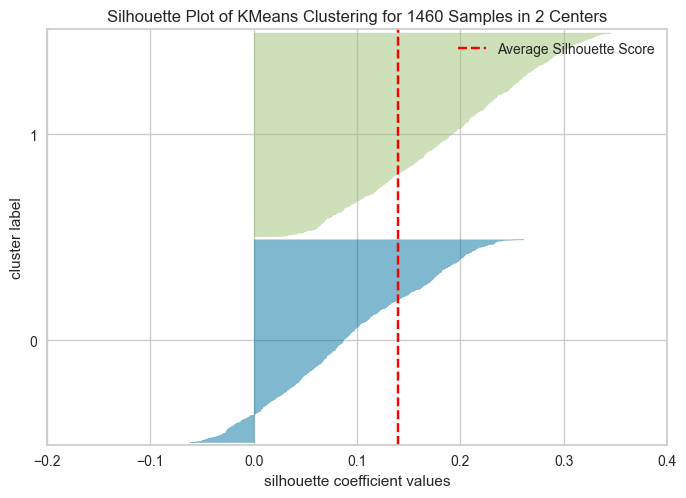

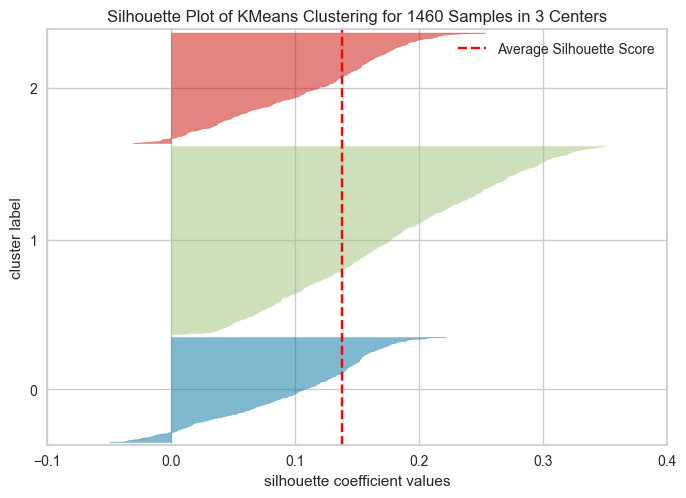

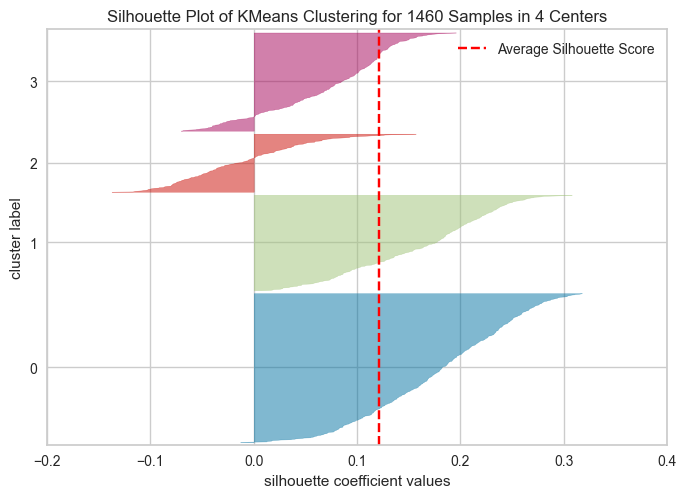

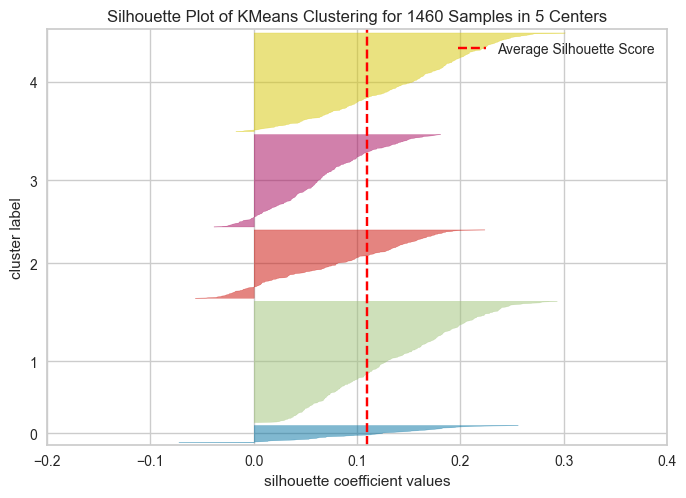

In [57]:
for i in range(2,6):
    kms = KMeans(n_clusters = i)
    kms.fit(df_num_standardized)
    model = KMeans(n_clusters = i, random_state = 42)
    visualizer = SilhouetteVisualizer(model, colors = 'yellowbrick')
    visualizer.fit(df_num_standardized)
    visualizer.show()

SINCE NONE OF CLUSTERS ARE GOOD, WE CANT PERFORM CLUSTERING TO THIS DATASET.CLUSTERING IS NOT MANDATORY,BUT DOING CLUSTERING IS GOOD.
IF BUSINESS REQUIREMENT IS NEEDED, THEN WE CAN GIVE 2 CLUSTERS, BUT CLIENT WONT ACCEPT CLUSTER =2, HENCE GO WITH 3 CLUSTERS

In [58]:
# lets tske optimal clusters
kmeans=KMeans(n_clusters=3,n_init=15,random_state=2)
kmeans.fit(df_num_standardized)

KMeans(n_clusters=3, n_init=15, random_state=2)

In [59]:
df_lables=pd.DataFrame(kmeans.labels_,columns=list(["labels"]))
df_lables["labels"]=df_lables["labels"].astype("object")

In [60]:
df_new_clusters=df.join(df_lables)

In [61]:
df_new_clusters.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,labels
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0


In [62]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [63]:
df_new_clusters.groupby("labels")[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']].describe()

LotFrontage                                                       \
             count       mean        std   min   25%   50%   75%    max   
labels                                                                    
0            313.0  74.833866  24.493809  24.0  63.0  75.0  85.0  174.0   
1            577.0  63.663778  18.361852  21.0  54.0  60.0  74.0  153.0   
2            311.0  77.083601  30.066154  30.0  62.0  75.0  89.0  313.0   

       LotArea                ... MoSold       YrSold                         \
         count          mean  ...    75%   max  count         mean       std   
labels                        ...                                              
0        401.0  11217.620948  ...   8.00  12.0  401.0  2007.775561  1.328345   
1        682.0   8639.370968  ...   7.75  12.0  682.0  2007.826979  1.327216   
2        377.0  13167.777188  ...   8.00  12.0  377.0  2007.838196  1.332022   

                                                
           min     25%     50%     75%     max  
labels                                          
0       2006.0  2007.0  2008.0  2009.0  2010.0  
1       2006.0  2007.0  2008.0  2009.0  2010.0  
2       2006.0  2007.0  2008.0  2009.0  2010.0  

[3 rows x 264 columns]

<AxesSubplot:xlabel='labels', ylabel='SalePrice'>

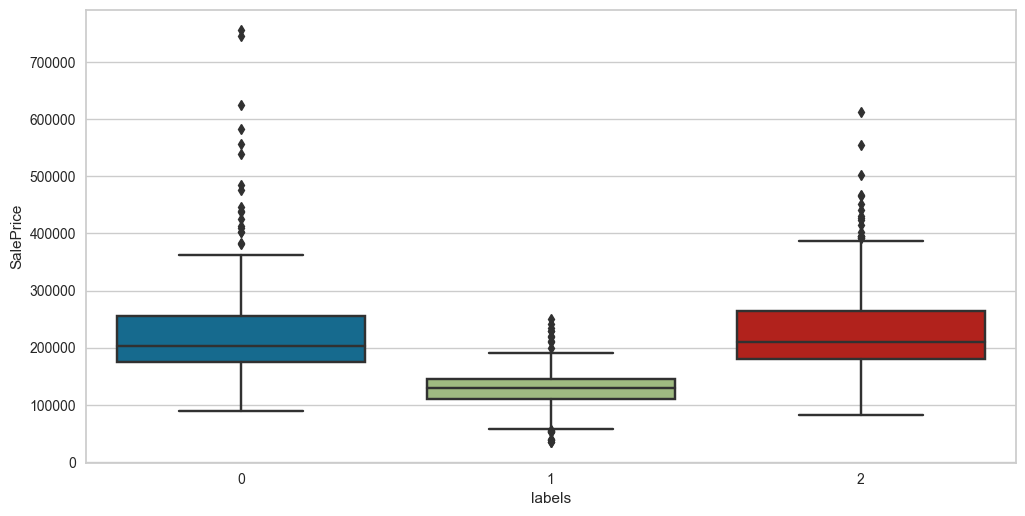

In [64]:
plt.figure(figsize=(12,6))
sns.boxplot(x="labels",y="SalePrice",data=df_new_clusters)

THE BODY OF BOXPLOT IS OVERLAPPING, WHICH SAYS THAT CLUSTERS ARE NOT OF GOOD QUALITY.
CLUSTER 2 IS GOOD, BUT 1 AND 0 ARE OVERLAPPING

# PCA

In [65]:
from sklearn.decomposition import PCA

In [66]:
df_num_standardized.shape

(1460, 33)

In [67]:
pca_hp=PCA().fit(df_num_standardized)

In [68]:
pca_hp.explained_variance_

array([6.55140008e+00, 3.14986432e+00, 2.48600899e+00, 1.88432690e+00,
       1.30983403e+00, 1.15589517e+00, 1.12442318e+00, 1.11708805e+00,
       1.08067584e+00, 1.03637664e+00, 1.01637558e+00, 9.96032548e-01,
       9.51338274e-01, 9.05082971e-01, 8.93799250e-01, 8.52767424e-01,
       8.20315876e-01, 7.36918410e-01, 7.04323197e-01, 6.45078964e-01,
       6.18234253e-01, 5.83710687e-01, 4.87396614e-01, 4.23489391e-01,
       3.87056604e-01, 2.99233052e-01, 2.28382612e-01, 2.00239444e-01,
       1.51784285e-01, 1.30544068e-01, 9.46215296e-02, 1.29203585e-30,
       5.82609966e-32])

In [69]:
pca_hp.explained_variance_ratio_

array([1.98391297e-01, 9.53850569e-02, 7.52820075e-02, 5.70617049e-02,
       3.96647539e-02, 3.50031352e-02, 3.40500917e-02, 3.38279673e-02,
       3.27253229e-02, 3.13838422e-02, 3.07781647e-02, 3.01621313e-02,
       2.88086870e-02, 2.74079712e-02, 2.70662745e-02, 2.58237375e-02,
       2.48410308e-02, 2.23155658e-02, 2.13285086e-02, 1.95344585e-02,
       1.87215395e-02, 1.76760874e-02, 1.47594782e-02, 1.28242221e-02,
       1.17209545e-02, 9.06145750e-03, 6.91594502e-03, 6.06370587e-03,
       4.59637343e-03, 3.95317134e-03, 2.86535516e-03, 3.91257846e-32,
       1.76427551e-33])

In [70]:
pca_hp.components_

array([[ 1.85909004e-01,  1.23787912e-01,  2.36999863e-01, ...,
        -8.79816874e-03,  2.13195754e-02, -1.35226796e-02],
       [ 3.88202169e-02, -1.05753683e-02, -2.28344719e-01, ...,
         2.82218496e-02,  3.01367848e-02, -3.80426302e-02],
       [ 2.81770580e-01,  2.89235231e-01, -3.13595880e-01, ...,
         4.10372593e-02, -1.67502844e-02,  5.97972135e-03],
       ...,
       [ 5.09080280e-02, -1.08506323e-02, -1.97477942e-01, ...,
         1.35496813e-02, -4.75549683e-03,  6.03440316e-03],
       [-1.75477602e-16,  7.73215579e-17,  1.48858049e-16, ...,
         8.16503788e-17,  9.00043493e-17,  4.06936101e-17],
       [ 0.00000000e+00,  3.27404926e-17, -2.84124399e-16, ...,
         1.07240364e-16, -6.60188807e-17,  3.51200786e-17]])

In [71]:
var=np.cumsum(np.round(pca_hp.explained_variance_ratio_,decimals=3)*100)
var

array([ 19.8,  29.3,  36.8,  42.5,  46.5,  50. ,  53.4,  56.8,  60.1,
        63.2,  66.3,  69.3,  72.2,  74.9,  77.6,  80.2,  82.7,  84.9,
        87. ,  89. ,  90.9,  92.7,  94.2,  95.5,  96.7,  97.6,  98.3,
        98.9,  99.4,  99.8, 100.1, 100.1, 100.1])

In [72]:
pca_hp_new=PCA(n_components=16)
data_reduced=pca_hp_new.fit_transform(df_num_standardized)
data_reduced.T

array([[ 1.27685757,  0.18842635,  1.46190314, ...,  0.61127791,
        -2.65874946, -0.58903263],
       [ 0.13026798, -1.01347955,  0.05517209, ...,  3.21761726,
        -1.77832087, -1.37665359],
       [-1.47298247,  0.82599466, -1.32301924, ...,  0.92829454,
         2.13411038,  1.64115801],
       ...,
       [-0.43429334,  0.59269096, -0.00924356, ...,  1.8382192 ,
         0.78675919,  0.10025697],
       [ 0.51916326, -0.30300582,  0.09030051, ..., -1.95884506,
        -1.89568526, -0.72744469],
       [-0.93264187, -0.55081916,  0.04760815, ..., -0.64550114,
         1.15208792,  1.16045877]])

In [73]:
pca_hp_new=pd.DataFrame(data_reduced)
pca_hp_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.276858,0.130268,-1.472982,-2.325751,1.357645,-0.680444,-0.272423,0.053211,-0.357790,0.480622,-0.227008,-0.450792,0.770712,-0.434293,0.519163,-0.932642
1,0.188426,-1.013480,0.825995,0.162842,-1.113564,1.373267,2.887072,-0.378783,0.032887,-0.108125,-0.621866,-2.575568,0.060923,0.592691,-0.303006,-0.550819
2,1.461903,0.055172,-1.323019,-1.724879,0.086509,0.498145,-0.451538,0.009656,-0.112980,0.019988,0.115412,0.709736,0.151726,-0.009244,0.090301,0.047608
3,-0.599675,1.090455,0.956809,-0.084259,0.464731,-0.648563,-0.872444,0.986039,-2.806436,-1.210951,1.398754,0.412230,2.745151,1.426307,0.124714,-0.257922
4,4.160758,0.958793,-0.580671,-1.699186,0.127326,1.323863,-0.107898,-0.115422,-0.103103,-0.684679,0.134859,0.927449,-0.047761,0.450085,0.193923,0.465238


In [74]:
pca_hp_new.columns=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15']
pca_hp_new.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,1.276858,0.130268,-1.472982,-2.325751,1.357645,-0.680444,-0.272423,0.053211,-0.357790,0.480622,-0.227008,-0.450792,0.770712,-0.434293,0.519163,-0.932642
1,0.188426,-1.013480,0.825995,0.162842,-1.113564,1.373267,2.887072,-0.378783,0.032887,-0.108125,-0.621866,-2.575568,0.060923,0.592691,-0.303006,-0.550819
2,1.461903,0.055172,-1.323019,-1.724879,0.086509,0.498145,-0.451538,0.009656,-0.112980,0.019988,0.115412,0.709736,0.151726,-0.009244,0.090301,0.047608
3,-0.599675,1.090455,0.956809,-0.084259,0.464731,-0.648563,-0.872444,0.986039,-2.806436,-1.210951,1.398754,0.412230,2.745151,1.426307,0.124714,-0.257922
4,4.160758,0.958793,-0.580671,-1.699186,0.127326,1.323863,-0.107898,-0.115422,-0.103103,-0.684679,0.134859,0.927449,-0.047761,0.450085,0.193923,0.465238


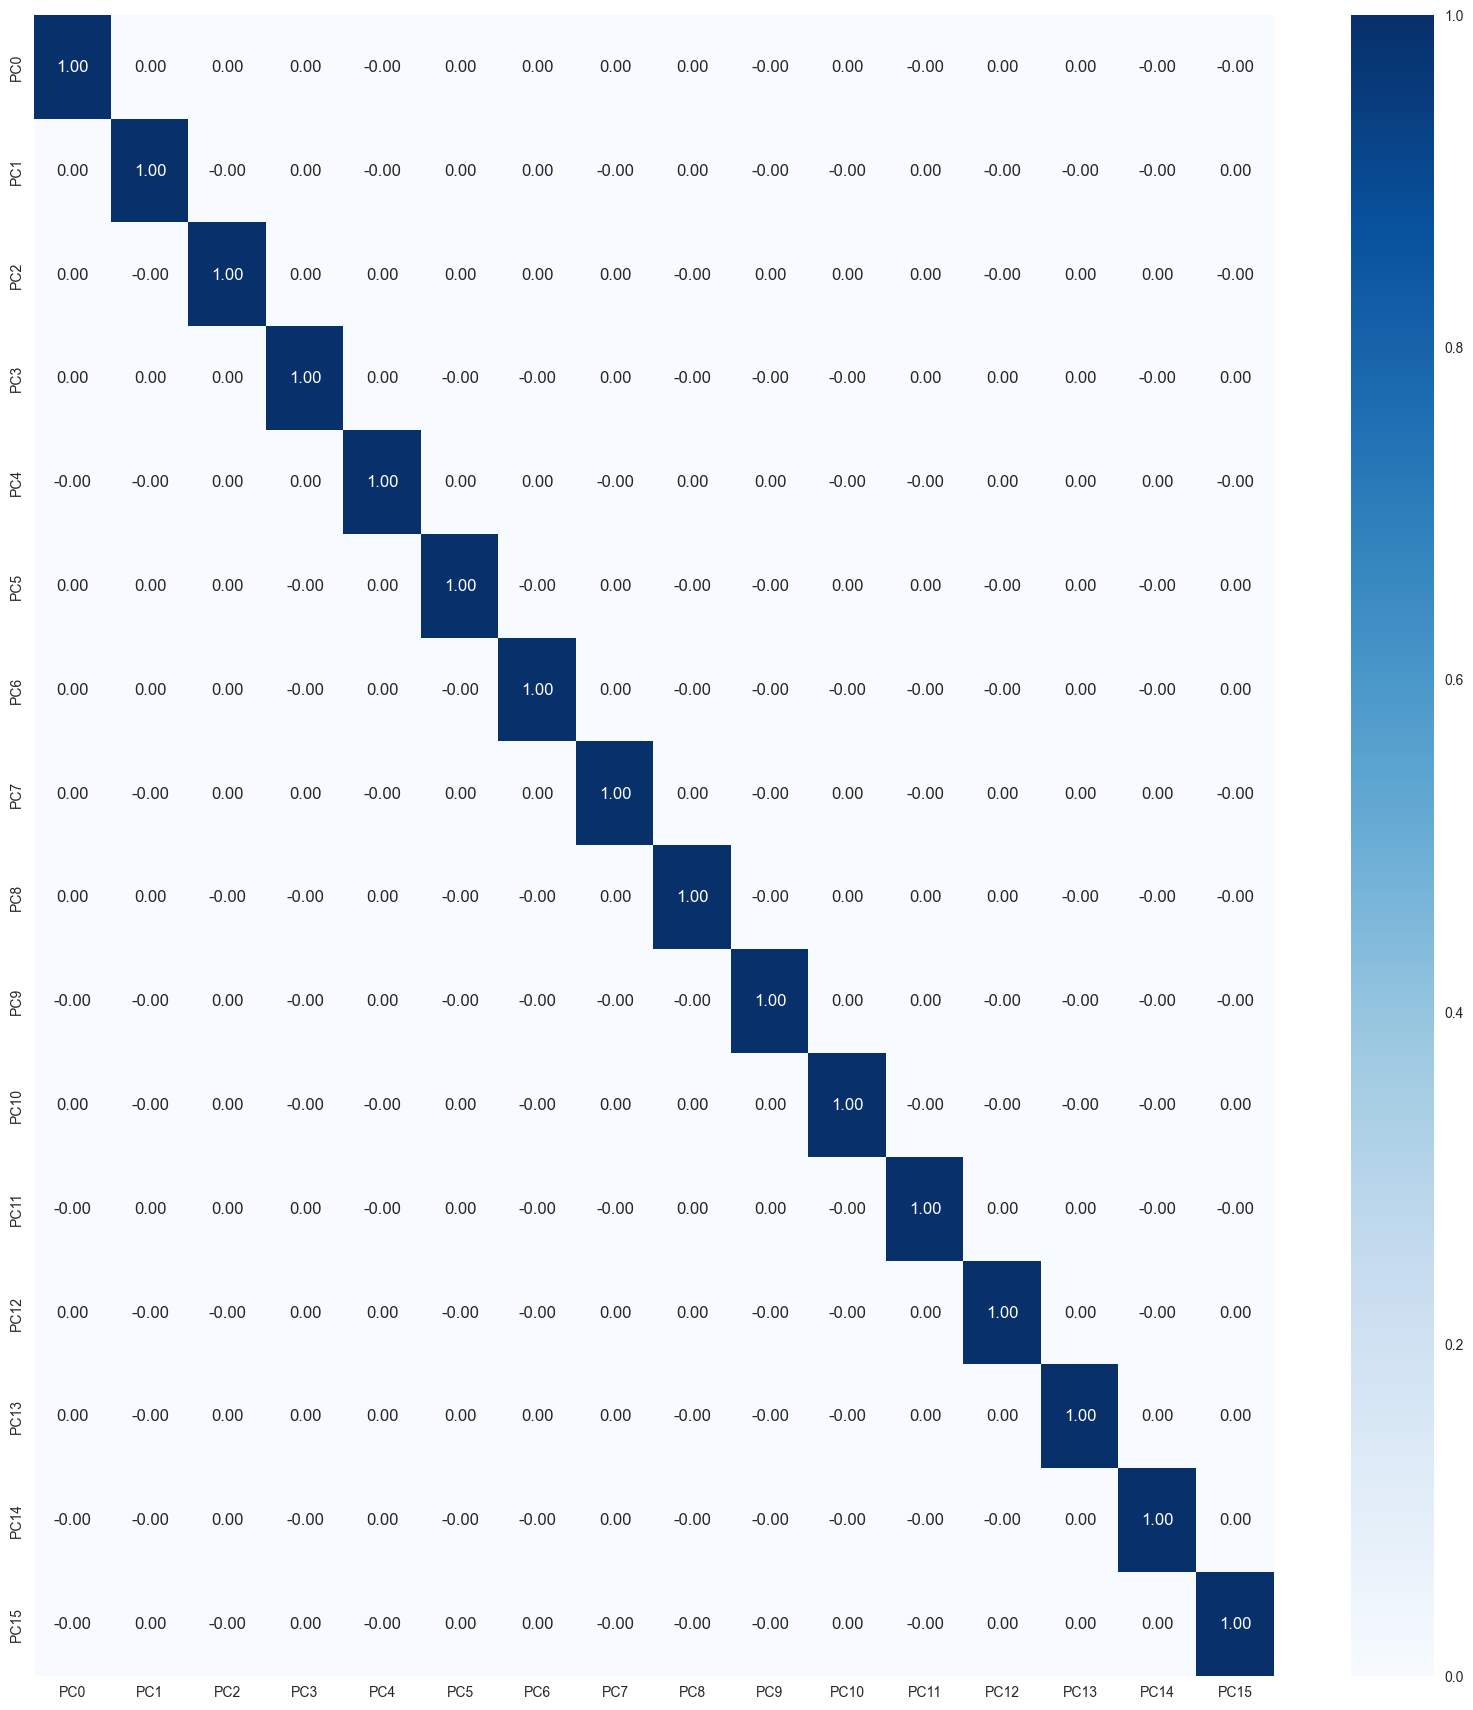

In [75]:
plt.figure(figsize=(20,22))
sns.heatmap(pca_hp_new.corr(),annot=True,cmap="Blues",fmt="0.2f")
plt.show()

CHECK PERFORMANCE OF MODEL USING DIFFERENT ALGORITHMS

In [76]:
import sklearn.tree as tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [77]:
annr=MLPRegressor(hidden_layer_sizes=(500),random_state=123,max_iter=10000)
rfr=RandomForestRegressor(random_state=123)
dtr=tree.DecisionTreeRegressor(random_state=123)

In [78]:
df_pricedataset=pd.concat([df_num_sc,df_cat_en],axis=1)
df_pricedataset.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava,MasVnrType_ava
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.81,12.21
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,11.89
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,...,12.04,12.06,11.99,11.79,12.02,12.03,12.04,12.06,12.22,11.89
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21


In [79]:
X=df_pricedataset
y=df_target

In [80]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.30)

DECISION TREE

In [81]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=123)

Accuracy score fot the decision tree model

In [82]:
dtr.score(x_train,y_train)       

1.0

In [83]:
dtr.score(x_test,y_test)

0.7050668568460505

In [84]:
np.sqrt(mean_squared_error(y_train,dtr.predict(x_train)))

0.0

In [85]:
np.sqrt(mean_squared_error(y_test,dtr.predict(x_test)))

0.20669464054827863

Fine tuning for decision tree model

In [86]:
param_grid={ "max_depth":[10,15,20,25,30], "min_samples_leaf":[3,15,30],"min_samples_split":[15,30,35,40,45]}
# min no of sample required for leaf to exist=min samples leaf, 
# min no of sampel required for node to split=min sample split
# total 5*3*5 =75 combinations



dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search=GridSearchCV(estimator=dtr,param_grid=param_grid,cv=3)


grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [15, 30, 35, 40, 45]})

In [87]:
print("Best paramaters :",grid_search.best_params_)

Best paramaters : {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 35}


In [88]:
dtr=tree.DecisionTreeRegressor(max_depth=10,min_samples_leaf=3,min_samples_split=35,random_state=123)


dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=35,
                      random_state=123)

In [89]:
print("Score for training :",dtr.score(x_train,y_train))
print("Score for testing :",dtr.score(x_test,y_test))

Score for training : 0.8843228840029983
Score for testing : 0.7709190475655975


In [90]:
print("rmse for train :",np.sqrt(mean_squared_error(y_train,dtr.predict(x_train))))
print("rmse for test :",np.sqrt(mean_squared_error(y_test,dtr.predict(x_test))))


rmse for train : 0.13835357125891018
rmse for test : 0.18216373247687745


RANDOM FOREST

In [91]:
rfr=RandomForestRegressor()

In [92]:
rfr.fit(x_train,y_train)          # random forest=rfr

RandomForestRegressor()

In [93]:
print("score for training :",rfr.score(x_train,y_train))
print("score for test :",rfr.score(x_test,y_test))
# overfit model as the test data r2 scor should be between 10% of train data(0.950-(0.10*0.095)=0.855)
# the test score shoulf be between 0.855 t0 0.950

score for training : 0.9804998698926207
score for test : 0.8829108757831613


In [94]:
print("rmse for train :",np.sqrt(mean_squared_error(y_train,rfr.predict(x_train))))
print("rmse for test :",np.sqrt(mean_squared_error(y_test,rfr.predict(x_test))))


rmse for train : 0.056804848009490455
rmse for test : 0.13023439744829374


Fine tune the model using Gridsearchcv

In [95]:
param_grid={ "max_depth":[10,15,20,25,30], "min_samples_leaf":[3,15,30],"min_samples_split":[15,30,35,40,45],
            "max_features":[4,6], "n_estimators":[300,500]}


rfr=RandomForestRegressor(random_state=123)
grid_search=GridSearchCV(estimator=rfr,param_grid=param_grid,cv=3,n_jobs=-1)



In [96]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [15, 30, 35, 40, 45],
                         'n_estimators': [300, 500]})

In [97]:
print("Best paramaters :",grid_search.best_params_)

Best paramaters : {'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 500}


In [98]:
print(grid_search.best_params_)

rfr = RandomForestRegressor(n_estimators=500,
                            max_depth=10,
                            max_features=6,
                            min_samples_split=30,
                            min_samples_leaf=3,
                            random_state=123)

rfr.fit(x_train,y_train)

print("Score for training",rfr.score(x_train,y_train))
print("Score for testing",rfr.score(x_test,y_test))

{'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 500}
Score for training 0.8845943640361721
Score for testing 0.8536057111016876


In [99]:
print("rmse for train :",np.sqrt(mean_squared_error(y_train,rfr.predict(x_train))))
print("rmse for test :",np.sqrt(mean_squared_error(y_test,rfr.predict(x_test))))


rmse for train : 0.13819112644428322
rmse for test : 0.14562283894075687


GRADIENT BOOSTING

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

In [101]:
gbr = GradientBoostingRegressor()

In [102]:
gbr.fit(x_train,y_train) 

GradientBoostingRegressor()

In [103]:
print("score for training :",gbr.score(x_train,y_train))
print("score for test :",gbr.score(x_test,y_test))

score for training : 0.9635424680638519
score for test : 0.9069069176039483


In [104]:
print("rmse for train :",np.sqrt(mean_squared_error(y_train,gbr.predict(x_train))))
print("rmse for test :",np.sqrt(mean_squared_error(y_test,gbr.predict(x_test))))


rmse for train : 0.07767124741869968
rmse for test : 0.1161251081379233


In [105]:
# grid search cv
param_grid={ "criterion":["friedman_mse","squared_error"],
            "loss":["squared_error","huber"] ,
            "n_estimators":[100,200,300]
           #"min_samples_split":[30,50,100]
           #"learning_rate":[0.1]
           }


gbr=GradientBoostingRegressor(random_state=123)
grid_search=GridSearchCV(estimator=gbr,param_grid=param_grid,cv=5,n_jobs=-1)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'huber'],
                         'n_estimators': [100, 200, 300]})

In [106]:
print("Best paramaters :",grid_search.best_params_)

Best paramaters : {'criterion': 'friedman_mse', 'loss': 'huber', 'n_estimators': 300}


In [107]:
gbr=GradientBoostingRegressor(criterion="friedman_mse",loss="huber",n_estimators=300)

gbr.fit(x_train,y_train)

GradientBoostingRegressor(loss='huber', n_estimators=300)

In [108]:
print("score for training :",gbr.score(x_train,y_train))
print("score for test :",gbr.score(x_test,y_test))

score for training : 0.9789314578713894
score for test : 0.9068325792583812


In [109]:
print("rmse for train :",np.sqrt(mean_squared_error(y_train,gbr.predict(x_train))))
print("rmse for test :",np.sqrt(mean_squared_error(y_test,gbr.predict(x_test))))


rmse for train : 0.05904510375740131
rmse for test : 0.11617146402994713


XTreme Gradient Boosting

In [110]:
from xgboost import XGBRegressor

In [111]:
xgb=XGBRegressor()

xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [112]:
print("score for training :",xgb.score(x_train,y_train))       # xgb has more no of parameters,
print("score for test :",xgb.score(x_test,y_test))

score for training : 0.9998191353453444
score for test : 0.8772548500617257


In [113]:
print("rmse for train :",np.sqrt(mean_squared_error(y_train,xgb.predict(x_train))))
print("rmse for test :",np.sqrt(mean_squared_error(y_test,xgb.predict(x_test))))


rmse for train : 0.0054707075529951
rmse for test : 0.13334280803242382


In [114]:
# grid search cv
param_grid={  "colsample_bytree":[0.5,0.8],
            "max_depth":[2,4,6],
            "n_estimators":[100,200,300],
           #"min_samples_split":[30,50,100]
           "learning_rate":[0.1]}
                                  
                                  
                    
xgb=XGBRegressor(random_state=123)
grid_search=GridSearchCV(estimator=xgb,param_grid=param_grid,cv=5,n_jobs=-1)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=123, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
        

In [115]:
print("Best paramaters :",grid_search.best_params_)

Best paramaters : {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}


In [116]:
xgb=XGBRegressor(learning_rate=0.1,max_depth=2,n_estimators=300,colsample_bytree=0.5)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [117]:
print("score for training :",xgb.score(x_train,y_train))       # xgb has more no of parameters,
print("score for test :",xgb.score(x_test,y_test))

score for training : 0.960797306904009
score for test : 0.9101182736403652


In [118]:
print("rmse for train :",np.sqrt(mean_squared_error(y_train,xgb.predict(x_train))))
print("rmse for test :",np.sqrt(mean_squared_error(y_test,xgb.predict(x_test))))


rmse for train : 0.08054240600843268
rmse for test : 0.11410459369613757


Feature Selection and use of Pipeline

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [120]:
df_pricedataset

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava,MasVnrType_ava
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.81,12.21
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,11.89
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,...,12.04,12.06,11.99,11.79,12.02,12.03,12.04,12.06,12.22,11.89
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917.0,1999.0,2000.0,0.0,0.0,0.0,953.0,953.0,953.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,11.89
1456,85.0,13175.0,1978.0,1988.0,119.0,790.0,163.0,589.0,1542.0,2073.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,11.88,12.22,12.21
1457,66.0,9042.0,1941.0,2006.0,0.0,275.0,0.0,877.0,1152.0,1188.0,...,12.04,12.06,11.99,12.01,12.02,11.87,12.04,11.88,12.22,11.89
1458,68.0,9717.0,1950.0,1996.0,0.0,49.0,1029.0,0.0,1078.0,1078.0,...,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.81,11.89


In [121]:
pipe = Pipeline((
('sfm',SelectFromModel(estimator=RandomForestRegressor(), max_features=70)),
('lr', LinearRegression())
))
pipe.fit(x_train,y_train)
print('Training R2')
print(pipe.score(x_train,y_train))
print()
print('Testing R2')
print(pipe.score(x_test,y_test))


Training R2
0.8343360132114371

Testing R2
0.8406598452470103


Scaling with Pipeline and cross val score

In [122]:
pipe = Pipeline((
('sc',StandardScaler()),
('lr', LinearRegression()),
))
pipe.fit(x_train,y_train)
print('Training R2')
print(pipe.score(x_train,y_train))
print()
print('Testing R2')
print(pipe.score(x_test,y_test))


print("Series of score 10")
Crossvalscore=cross_val_score(pipe,x_train,y_train,cv=10)
print(Crossvalscore)

print("Mean R2")
print(np.mean(Crossvalscore))

Training R2
0.9021338659991625

Testing R2
0.8998425455643057
Series of score 10
[ 0.78436389  0.86904596 -1.34842382  0.8788475   0.86524608  0.8870411
  0.89835808  0.88971759  0.69770221  0.89681723]
Mean R2
0.6318715814779621


Use of Column Transformer-Scaling and Encoding the variables

In [123]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

In [124]:
col_trans=ColumnTransformer([("catboost",ce.cat_boost.CatBoostEncoder(),make_column_selector(dtype_exclude=np.number))])

In [125]:
df_cat_en=pd.DataFrame(col_trans.fit_transform(df_cat,df_target),columns=df_cat.columns)
df_cat_en.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava,MasVnrType_ava
0,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,...,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051
1,12.024051,12.135873,12.135873,12.135873,12.135873,12.135873,12.024051,12.135873,12.024051,12.024051,...,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.024051,12.024051
2,12.135873,12.126919,12.126919,12.024051,12.126919,12.126919,12.135873,12.126919,12.135873,12.135873,...,12.126919,12.126919,12.126919,12.126919,12.126919,12.126919,12.126919,12.126919,12.066531,12.135873
3,12.024051,12.174481,12.174481,12.170609,12.174481,12.174481,12.024051,12.174481,12.024051,12.196304,...,12.174481,12.174481,12.174481,12.024051,12.174481,12.174481,12.174481,12.174481,12.150076,12.066531
4,12.196304,12.109464,12.109464,12.063538,12.109464,12.109464,12.066531,12.109464,12.024051,12.109577,...,12.109464,12.109464,12.109464,12.174481,12.109464,12.109464,12.109464,12.109464,12.074907,12.196304


In [126]:
# pipe line for decision tree
from sklearn.tree import DecisionTreeRegressor

pipe = Pipeline((
("dt",DecisionTreeRegressor(max_depth=5)),
))
pipe.fit(x_train,y_train)

pipe.fit(x_train,y_train)
print('Training R2')
print(pipe.score(x_train,y_train))
print()
print('Testing R2')
print(pipe.score(x_test,y_test))

print("Series of score 10")
Crossvalscore=cross_val_score(pipe,x_train,y_train,cv=10)
print(Crossvalscore)

print("Mean R2")
print(np.mean(Crossvalscore))

Training R2
0.853069074975124

Testing R2
0.7547037891699806
Series of score 10
[0.62934399 0.7054264  0.6821021  0.71738982 0.73652248 0.76925638
 0.67850146 0.80471671 0.7252418  0.76552666]
Mean R2
0.7214027795474929


Application of RFE-Feature elimination method

In [127]:
from sklearn.feature_selection import RFE

In [128]:
rfe_pipe=Pipeline((
    ("rfe",RFE(estimator=LinearRegression(),n_features_to_select=50)),
    ("lr", LinearRegression())  
))

In [129]:
rfe_pipe.fit(x_train,y_train)

Pipeline(steps=[('rfe',
                 RFE(estimator=LinearRegression(), n_features_to_select=50)),
                ('lr', LinearRegression())])

In [130]:
print('Training R2')
print(rfe_pipe.score(x_train,y_train))
print()
print('Testing R2')
print(rfe_pipe.score(x_test,y_test))

Training R2
0.8734142341169213

Testing R2
0.8692837515932236


In [131]:
print("Series of score 10")
Crossvalscore=cross_val_score(rfe_pipe,x_train,y_train,cv=10)
print(Crossvalscore)
print("Mean R2")
print(np.mean(Crossvalscore))

Series of score 10
[ 0.8407882   0.83775986 -0.3338293   0.83858145  0.85948071  0.87875573
  0.86404188  0.84588821  0.78835802  0.86644184]
Mean R2
0.7286266591767337


PCA IN PIPELINE

In [132]:
from sklearn.decomposition import PCA

In [133]:
pca_pipe=Pipeline((
    ("sc",StandardScaler()),
    ("pca",PCA(n_components=35)),
    ("lr",LinearRegression())  
))

pca_pipe.fit(x_train,y_train)

Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA(n_components=35)),
                ('lr', LinearRegression())])

In [134]:
print('Training R2')
print(pca_pipe.score(x_train,y_train))
print()
print('Testing R2')
print(pca_pipe.score(x_test,y_test))

print("Series of score 10")
Crossvalscore=cross_val_score(pca_pipe,x_train,y_train,cv=10)
print(Crossvalscore)
print("Mean R2")
print(np.mean(Crossvalscore))

Training R2
0.8647390435736035

Testing R2
0.8786473839030947
Series of score 10
[0.78629362 0.82223555 0.82246075 0.87986919 0.86110075 0.85989338
 0.89248378 0.87098534 0.5862875  0.89641866]
Mean R2
0.8278028519866376


In [135]:
pca_pipe["pca"].explained_variance_ratio_

array([0.18827138, 0.05639044, 0.0465766 , 0.03511502, 0.02871379,
       0.02691452, 0.02553225, 0.02324356, 0.02135786, 0.02016892,
       0.01943146, 0.01840908, 0.01757507, 0.01729261, 0.01618329,
       0.01607702, 0.01538455, 0.01506306, 0.01480902, 0.01419149,
       0.01387912, 0.01322444, 0.01309454, 0.01276287, 0.01254957,
       0.01241611, 0.01233727, 0.01168462, 0.01118143, 0.01099162,
       0.01030891, 0.0100517 , 0.00991311, 0.00939568, 0.00935134])

In [136]:
pca_pipe["pca"].explained_variance_ratio_.cumsum()

array([0.18827138, 0.24466182, 0.29123842, 0.32635344, 0.35506722,
       0.38198174, 0.407514  , 0.43075755, 0.45211542, 0.47228433,
       0.49171579, 0.51012487, 0.52769994, 0.54499255, 0.56117585,
       0.57725287, 0.59263742, 0.60770048, 0.6225095 , 0.63670099,
       0.65058012, 0.66380456, 0.6768991 , 0.68966197, 0.70221154,
       0.71462765, 0.72696492, 0.73864954, 0.74983097, 0.76082259,
       0.7711315 , 0.78118319, 0.7910963 , 0.80049199, 0.80984333])

Comparing the performance of the models

In [137]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [138]:
gbr=GradientBoostingRegressor(n_estimators=150)
ada=AdaBoostRegressor()
rfr=RandomForestRegressor(n_estimators=100)
dtr=DecisionTreeRegressor()
lr=LinearRegression()

In [139]:
models=[]
models.append(("Linear Regression",lr))
models.append(("Decision Tree Regressor",dtr))
models.append(("Random forest regressor",rfr))
models.append(("Gradient boosting regressor",gbr))

models

[('Linear Regression', LinearRegression()),
 ('Decision Tree Regressor', DecisionTreeRegressor()),
 ('Random forest regressor', RandomForestRegressor()),
 ('Gradient boosting regressor', GradientBoostingRegressor(n_estimators=150))]

In [140]:
import sklearn.model_selection as model_selection

Linear Regression: 0.630854 (0.422559)
Decision Tree Regressor: 0.651009 (0.058266)
Random forest regressor: 0.859251 (0.018305)
Gradient boosting regressor: 0.884161 (0.014227)


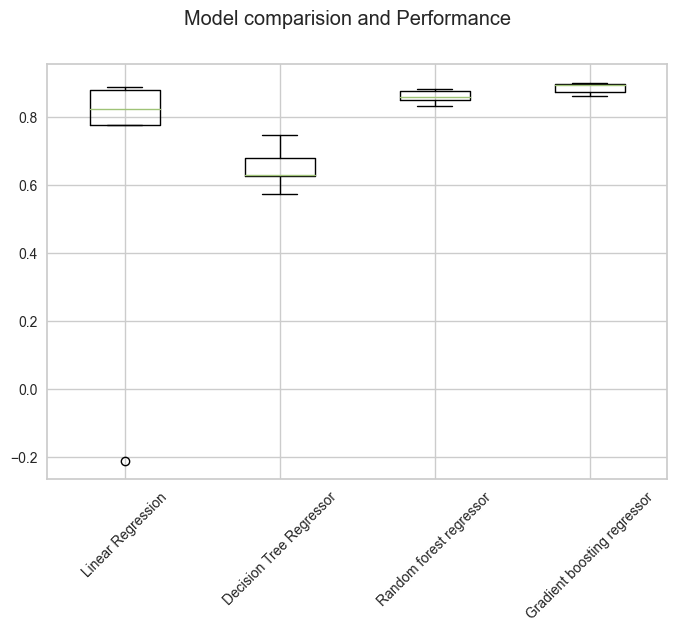

In [141]:
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=5)

    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.std())
    print(msg)

# comparision of Algorithms using Boxplots
fig = plt.figure()
fig.suptitle('Model comparision and Performance')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=45)
plt.show()

# "GRADIENT BOOSTING REGRESSOR" IS THE BEST MODEL AS THE STD IS LEAST FOR THIS MODEL